In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('For Sale.csv')
df.head(3)

,property_type,price,location,locality,baths,area_sqft,bedrooms,year,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh
0,2,220000000,980,1042,0,32670.12,0,2019,False,False,False,True,False,False,True,False
1,2,40000000,1002,1063,5,5445.02,5,2018,False,False,False,True,False,False,True,False
2,2,9500000,430,459,0,2450.26,3,2019,False,False,False,True,False,False,True,False


In [98]:
df_or = pd.read_csv('Property_with_Feature_Engineering.csv')
df_or.head(3)

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"


In [99]:
df['property_type'] = df_or['property_type']
df.property_type

0         House
1         House
2         House
3         House
4         House
          ...  
127012    House
127013    House
127014    House
127015    House
127016    House
Name: property_type, Length: 127017, dtype: object

In [100]:
property_type_dummies = pd.get_dummies(df['property_type'],prefix='property_type')
df = pd.concat([df,property_type_dummies],axis=1)
df.drop(['property_type'],axis=1,inplace=True)
df.head()

,price,location,locality,baths,area_sqft,bedrooms,year,city_Faisalabad,city_Islamabad,city_Karachi,...,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh,property_type_Farm House,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion
0,220000000,980,1042,0,32670.12,0,2019,False,False,False,...,False,True,False,False,False,True,False,False,False,False
1,40000000,1002,1063,5,5445.02,5,2018,False,False,False,...,False,True,False,False,False,True,False,False,False,False
2,9500000,430,459,0,2450.26,3,2019,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,125000000,574,610,7,5445.02,8,2019,False,False,False,...,False,True,False,False,False,True,False,False,False,False
4,21000000,120,126,5,2994.76,6,2019,False,False,False,...,False,True,False,False,False,True,False,False,False,False


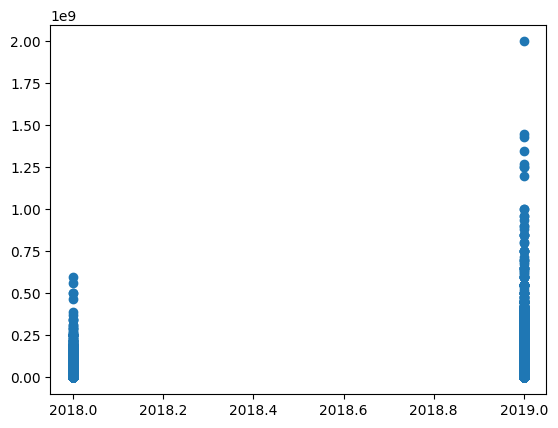

In [101]:
x = df.year
y = df.price

plt.scatter(x,y)

In [102]:
df['price_per_sqft'] = df['price'] / df['area_sqft']


In [103]:
import numpy as np

# Check for inf or -inf values in the DataFrame
print(np.isinf(df).sum())
print(np.isneginf(df).sum())

# Optionally, replace inf/-inf with NaN and then handle them
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(axis=0,inplace=True)
print(df.isna().sum())

price                               0
location                            0
locality                            0
baths                               0
area_sqft                           0
bedrooms                            0
year                                0
city_Faisalabad                     0
city_Islamabad                      0
city_Karachi                        0
city_Lahore                         0
city_Rawalpindi                     0
province_name_Islamabad Capital     0
province_name_Punjab                0
province_name_Sindh                 0
property_type_Farm House            0
property_type_Flat                  0
property_type_House                 0
property_type_Lower Portion         0
property_type_Penthouse             0
property_type_Room                  0
property_type_Upper Portion         0
price_per_sqft                     11
dtype: int64
price                              0
location                           0
locality                           0
ba

In [104]:
df.isna().sum()

price                              0
location                           0
locality                           0
baths                              0
area_sqft                          0
bedrooms                           0
year                               0
city_Faisalabad                    0
city_Islamabad                     0
city_Karachi                       0
city_Lahore                        0
city_Rawalpindi                    0
province_name_Islamabad Capital    0
province_name_Punjab               0
province_name_Sindh                0
property_type_Farm House           0
property_type_Flat                 0
property_type_House                0
property_type_Lower Portion        0
property_type_Penthouse            0
property_type_Room                 0
property_type_Upper Portion        0
price_per_sqft                     0
dtype: int64

In [83]:
df.locality

0         1042
1         1063
2          459
3          610
4          126
          ... 
127012     375
127013     524
127014     524
127015     524
127016     375
Name: locality, Length: 127017, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

rfr = RandomForestRegressor(n_estimators=30)
lr = LinearRegression()
knr = KNeighborsRegressor()

In [106]:
X = df.drop(['price'],axis=1)
y = df.price
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [142]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [143]:
lr.score(X_test,y_test)

0.15299801396056256

In [144]:
knr.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [145]:
knr.score(X_test,y_test)

0.945279559314578

In [146]:
rfr.fit(X_train,y_train)

,n_estimators,30
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [112]:
rfr.score(X_test,y_test)

0.9770641406652517

In [150]:
X_test.iloc[10]

location                                   585
locality                                   621
baths                                        3
area_sqft                              1442.93
bedrooms                                     3
year                                      2019
city_Faisalabad                          False
city_Islamabad                           False
city_Karachi                              True
city_Lahore                              False
city_Rawalpindi                          False
province_name_Islamabad Capital          False
province_name_Punjab                     False
province_name_Sindh                       True
property_type_Farm House                 False
property_type_Flat                       False
property_type_House                       True
property_type_Lower Portion              False
property_type_Penthouse                  False
property_type_Room                       False
property_type_Upper Portion              False
price_per_sqf

In [151]:
y_test.iloc[10]

np.int64(10000000)

In [152]:
rfr.predict([X_test.iloc[10]])

c:\Users\REZ\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10000000.])

In [153]:
import joblib
joblib.dump(rfr, '97%Model.pkl')

['97%Model.pkl']

In [154]:
df.columns

Index(['price', 'location', 'locality', 'baths', 'area_sqft', 'bedrooms',
       'year', 'city_Faisalabad', 'city_Islamabad', 'city_Karachi',
       'city_Lahore', 'city_Rawalpindi', 'province_name_Islamabad Capital',
       'province_name_Punjab', 'province_name_Sindh',
       'property_type_Farm House', 'property_type_Flat', 'property_type_House',
       'property_type_Lower Portion', 'property_type_Penthouse',
       'property_type_Room', 'property_type_Upper Portion', 'price_per_sqft'],
      dtype='object')

In [155]:
df.drop(['year', 'city_Faisalabad', 'city_Islamabad', 'city_Karachi',
       'city_Lahore', 'city_Rawalpindi', 'province_name_Islamabad Capital',
       'province_name_Punjab', 'province_name_Sindh','location'],axis=1,inplace=True)

In [156]:
df.columns

Index(['price', 'locality', 'baths', 'area_sqft', 'bedrooms',
       'property_type_Farm House', 'property_type_Flat', 'property_type_House',
       'property_type_Lower Portion', 'property_type_Penthouse',
       'property_type_Room', 'property_type_Upper Portion', 'price_per_sqft'],
      dtype='object')

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

rfr = RandomForestRegressor(n_estimators=30)
lr = LinearRegression()
knr = KNeighborsRegressor()

In [158]:
X = df.drop(['price'],axis=1)
y = df.price
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [160]:
X_train.columns

Index(['locality', 'baths', 'area_sqft', 'bedrooms',
       'property_type_Farm House', 'property_type_Flat', 'property_type_House',
       'property_type_Lower Portion', 'property_type_Penthouse',
       'property_type_Room', 'property_type_Upper Portion', 'price_per_sqft'],
      dtype='object')

In [161]:
rfr.fit(X_train,y_train)

,n_estimators,30
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [162]:
rfr.score(X_test,y_test)

0.9802517346259119

In [163]:
import joblib
joblib.dump(rfr, '98%Model.pkl')

['98%Model.pkl']

In [164]:
df.columns

Index(['price', 'locality', 'baths', 'area_sqft', 'bedrooms',
       'property_type_Farm House', 'property_type_Flat', 'property_type_House',
       'property_type_Lower Portion', 'property_type_Penthouse',
       'property_type_Room', 'property_type_Upper Portion', 'price_per_sqft'],
      dtype='object')

In [170]:
df_or.locality.to_csv('locality.csv')
df.price_per_sqft.to_csv('ppsqft.csv')

In [167]:
df_or.iloc[1]

property_id                                                 482892
location_id                                                     48
page_url         https://www.zameen.com/Property/lahore_multan_...
property_type                                                House
price                                                     40000000
price_bin                                                Very High
location                                               Multan Road
city                                                        Lahore
province_name                                               Punjab
locality                               Multan Road, Lahore, Punjab
latitude                                                 31.431593
longitude                                                 74.17998
baths                                                            5
area                                                       1 Kanal
area_marla                                                    

In [169]:
X.columns

Index(['locality', 'baths', 'area_sqft', 'bedrooms',
       'property_type_Farm House', 'property_type_Flat', 'property_type_House',
       'property_type_Lower Portion', 'property_type_Penthouse',
       'property_type_Room', 'property_type_Upper Portion', 'price_per_sqft'],
      dtype='object')